In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.special import gamma
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

from isurvmqj import (
    iSurvJ,
    iSurvMQ,
)

# Example (Quadratic dependence)

In [20]:
def load_weibull_quadratic_dependence(k=5, n_samples=500, n_features=5, cens=0.2, random_state=42):
    np.random.seed(random_state)
    
    features = np.random.rand(n_samples, n_features)
    
    Q = np.random.randn(n_features, n_features)
    Q = Q @ Q.T
    
    quad_term = np.einsum('ij,jk,ik->i', features, Q, features) 
    
    lambda_val = quad_term / gamma(1 + 1/k)
    U = np.random.uniform(0, 1, n_samples)
    time = lambda_val * (-np.log(U)) ** (1/k)
    
    delta = np.random.choice([0, 1], size=n_samples, p=[cens, 1 - cens])
    
    X = features
    
    y = np.zeros(n_samples, dtype=[('status', '?'), ('time', 'f8')])
    y['status'] = delta
    y['time'] = time
    
    return X, y

In [21]:
X, y = load_weibull_quadratic_dependence(n_samples=500, n_features=5)

delta_str, time_str = y.dtype.names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y[delta_str])

## iSurvM model

In [13]:
isurvm = iSurvMQ(method='mean', num_epoch=10, num_generation=100, num_epoch_M_pi_B=10)
isurvm.fit(X_train, y_train)

Epoch 1/10, Loss: 9.602605819702148
Epoch 2/10, Loss: 5.478902816772461
Epoch 3/10, Loss: 3.495384931564331
Epoch 4/10, Loss: 3.118149518966675
Epoch 5/10, Loss: 3.118826389312744
Epoch 6/10, Loss: 2.9724395275115967
Epoch 7/10, Loss: 2.9998507499694824
Epoch 8/10, Loss: 2.9502005577087402
Epoch 9/10, Loss: 2.9342331886291504
Epoch 10/10, Loss: 2.996145009994507
Epoch for learning probs 1/10, Loss: 2.7192153930664062
Epoch for learning probs 2/10, Loss: 2.8291234970092773
Epoch for learning probs 3/10, Loss: 2.7212255001068115
Epoch for learning probs 4/10, Loss: 2.693117141723633
Epoch for learning probs 5/10, Loss: 2.6733083724975586
Epoch for learning probs 6/10, Loss: 2.672320604324341
Epoch for learning probs 7/10, Loss: 2.673989772796631
Epoch for learning probs 8/10, Loss: 2.6569864749908447
Epoch for learning probs 9/10, Loss: 2.6990625858306885
Epoch for learning probs 10/10, Loss: 2.675443410873413


In [14]:
print(f'C-index: {isurvm.score(X_test, y_test)}') 
print(f'IBS: {isurvm.count_ibs(X_test, y_train, y_test)}') 

C-index: 0.8218918918918919
IBS: 0.11580112168203902


## iSurvQ model

In [ ]:
isurvq = iSurvMQ(method='quantile', num_epoch=10, num_generation=100, num_epoch_M_pi_B=10)
isurvq.fit(X_train, y_train)

Epoch 1/10, Loss: 9.137760162353516
Epoch 2/10, Loss: 4.42426872253418
Epoch 3/10, Loss: 3.711125612258911
Epoch 4/10, Loss: 3.1172518730163574
Epoch 5/10, Loss: 3.073089122772217
Epoch 6/10, Loss: 2.9843297004699707
Epoch 7/10, Loss: 3.000948429107666
Epoch 8/10, Loss: 2.9344050884246826
Epoch 9/10, Loss: 2.917051076889038
Epoch 10/10, Loss: 2.978250503540039
Epoch for learning probs 1/10, Loss: 2.7164833545684814
Epoch for learning probs 2/10, Loss: 2.7338860034942627
Epoch for learning probs 3/10, Loss: 2.703441858291626
Epoch for learning probs 4/10, Loss: 2.6757874488830566
Epoch for learning probs 5/10, Loss: 2.6775026321411133
Epoch for learning probs 6/10, Loss: 2.6532657146453857
Epoch for learning probs 7/10, Loss: 2.659574031829834
Epoch for learning probs 8/10, Loss: 2.648982048034668
Epoch for learning probs 9/10, Loss: 2.6664879322052
Epoch for learning probs 10/10, Loss: 2.6753554344177246


In [ ]:
print(f'C-index: {isurvq.score(X_test, y_test)}') 
print(f'IBS: {isurvq.count_ibs(X_test, y_train, y_test)}') 

C-index: 0.8302702702702702
IBS: 0.11545475458339495


## iSurvJ model

In [ ]:
isurvj = iSurvJ(num_epoch=200, lr=1e-2, dropout_rate=0.6, reg_alpha=2e-3, entropy_reg=2, mask_rate=0.1)
isurvj.fit(X_train, y_train)

Epoch 1/200, Loss: 1.148402214050293
Epoch 2/200, Loss: 1.120963454246521
Epoch 3/200, Loss: 0.9956714510917664
Epoch 4/200, Loss: 0.974905252456665
Epoch 5/200, Loss: 1.0237023830413818
Epoch 6/200, Loss: 0.9359274506568909
Epoch 7/200, Loss: 1.0232837200164795
Epoch 8/200, Loss: 0.951008677482605
Epoch 9/200, Loss: 0.9786503314971924
Epoch 10/200, Loss: 0.9826159477233887
Epoch 11/200, Loss: 0.926775336265564
Epoch 12/200, Loss: 0.9161437153816223
Epoch 13/200, Loss: 1.0743365287780762
Epoch 14/200, Loss: 0.9553431868553162
Epoch 15/200, Loss: 0.959856390953064
Epoch 16/200, Loss: 0.8961271643638611
Epoch 17/200, Loss: 0.9083353281021118
Epoch 18/200, Loss: 0.9487379193305969
Epoch 19/200, Loss: 0.9973869323730469
Epoch 20/200, Loss: 0.9227572679519653
Epoch 21/200, Loss: 0.9230753183364868
Epoch 22/200, Loss: 0.8967193365097046
Epoch 23/200, Loss: 0.8942135572433472
Epoch 24/200, Loss: 0.8788944482803345
Epoch 25/200, Loss: 0.8490810394287109
Epoch 26/200, Loss: 0.970906674861908
Ep

In [ ]:
print(f'C-index: {isurvj.score(X_test, y_test)}') 
print(f'IBS: {isurvj.count_ibs(X_test, y_train, y_test)}') 

C-index: 0.8418918918918918
IBS: 0.09639268988084752


### iSurvJ model with Gauss Kernel

In [ ]:
isurvj_gauss = iSurvJ(num_epoch=200, lr=1e-2, dropout_rate=0.6, reg_alpha=2e-3, entropy_reg=2, mask_rate=0.1, gauss_kernel=True)
isurvj_gauss.fit(X_train, y_train)

Epoch 1/200, Loss: 0.9130916595458984
Epoch 2/200, Loss: 0.9378272294998169
Epoch 3/200, Loss: 0.8847342133522034
Epoch 4/200, Loss: 0.9459271430969238
Epoch 5/200, Loss: 0.9379338622093201
Epoch 6/200, Loss: 0.9350790977478027
Epoch 7/200, Loss: 0.9134760499000549
Epoch 8/200, Loss: 0.9242551922798157
Epoch 9/200, Loss: 0.8816784620285034
Epoch 10/200, Loss: 0.9241952300071716
Epoch 11/200, Loss: 0.9189667701721191
Epoch 12/200, Loss: 0.9237604737281799
Epoch 13/200, Loss: 0.9090003371238708
Epoch 14/200, Loss: 0.9200310707092285
Epoch 15/200, Loss: 0.8990299701690674
Epoch 16/200, Loss: 0.9318139553070068
Epoch 17/200, Loss: 0.9102928042411804
Epoch 18/200, Loss: 0.9361888766288757
Epoch 19/200, Loss: 0.9054105281829834
Epoch 20/200, Loss: 0.8999083042144775
Epoch 21/200, Loss: 0.9067019820213318
Epoch 22/200, Loss: 0.8812041282653809
Epoch 23/200, Loss: 0.9202088713645935
Epoch 24/200, Loss: 0.9215675592422485
Epoch 25/200, Loss: 0.9104591608047485
Epoch 26/200, Loss: 0.941410541534

In [ ]:
print(f'C-index: {isurvj_gauss.score(X_test, y_test)}') 
print(f'IBS: {isurvj_gauss.count_ibs(X_test, y_train, y_test)}') 

C-index: 0.8386486486486486
IBS: 0.12315605257512918


# Example (Two circles)

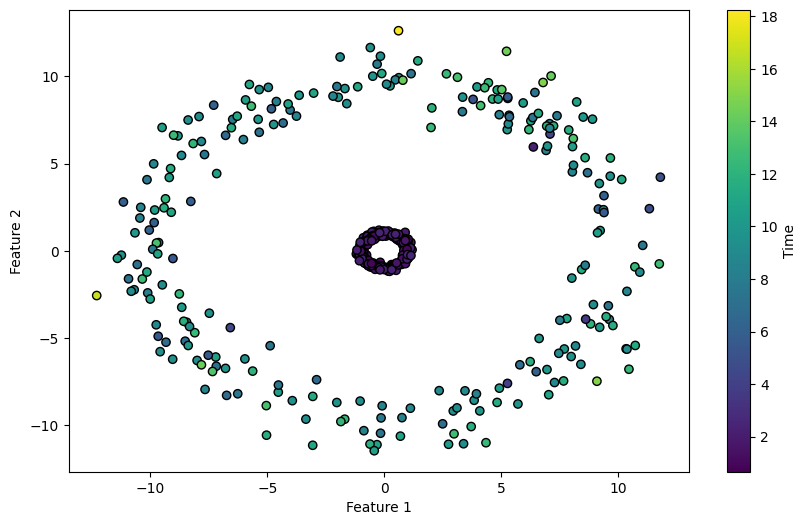

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import check_random_state

from sklearn.preprocessing import StandardScaler
from scipy.integrate import trapezoid

def generate_two_circular_clusters_with_times(k=5, n_samples=500, inner_radius=1.0, outer_radius=10.0,
                                               inner_noise=0.1, outer_noise=1.0, cens=0.2,
                                               random_state=42):
    generator = check_random_state(random_state)
    n_samples_per_cluster = n_samples // 2

    theta1 = generator.uniform(0, 2 * np.pi, n_samples_per_cluster)
    r1 = inner_radius + generator.normal(0, inner_noise, n_samples_per_cluster)
    r1 *= inner_radius
    x1 = r1 * np.cos(theta1)
    y1 = r1 * np.sin(theta1)

    theta2 = generator.uniform(0, 2 * np.pi, n_samples_per_cluster)
    r2 = outer_radius + generator.normal(0, outer_noise, n_samples_per_cluster)
    x2 = r2 * np.cos(theta2)
    y2 = r2 * np.sin(theta2)

    X = np.vstack([np.column_stack([x1, y1]), np.column_stack([x2, y2])])
    
    r_total = np.hypot(X[:, 0], X[:, 1])
    y = np.sin(r_total) + r_total

    lambda_val = np.abs(y) / gamma(1 + 1/k)
    U = generator.uniform(0, 1, n_samples)
    y = lambda_val * (-np.log(U)) ** (1/k)

    delta = generator.choice([0, 1], size=n_samples, p=[cens, 1 - cens])

    y_struct = np.zeros(n_samples, dtype=[('Censoring', '?'), ('Time', 'f8')])
    y_struct['Censoring'] = delta
    y_struct['Time'] = y

    return X, y_struct

X, y = generate_two_circular_clusters_with_times()

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y['Time'], cmap='viridis', edgecolors='k')
plt.colorbar(label='Time')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [16]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

delta_str, time_str = y.dtype.names

In [17]:
isurvm_circles = iSurvMQ(method='mean', num_epoch=10, num_generation=100, num_epoch_M_pi_B=10)
isurvm_circles.fit(X, y)

Epoch 1/10, Loss: 5.854781627655029
Epoch 2/10, Loss: 3.2559707164764404
Epoch 3/10, Loss: 3.124379873275757
Epoch 4/10, Loss: 3.047630786895752
Epoch 5/10, Loss: 3.065645694732666
Epoch 6/10, Loss: 2.923347234725952
Epoch 7/10, Loss: 2.9417903423309326
Epoch 8/10, Loss: 2.941392660140991
Epoch 9/10, Loss: 2.89990234375
Epoch 10/10, Loss: 2.9344849586486816
Epoch for learning probs 1/10, Loss: 2.6570096015930176
Epoch for learning probs 2/10, Loss: 2.6662607192993164
Epoch for learning probs 3/10, Loss: 2.655799388885498
Epoch for learning probs 4/10, Loss: 2.672484874725342
Epoch for learning probs 5/10, Loss: 2.6220345497131348
Epoch for learning probs 6/10, Loss: 2.666475296020508
Epoch for learning probs 7/10, Loss: 2.629260540008545
Epoch for learning probs 8/10, Loss: 2.634012222290039
Epoch for learning probs 9/10, Loss: 2.639305830001831
Epoch for learning probs 10/10, Loss: 2.6473228931427


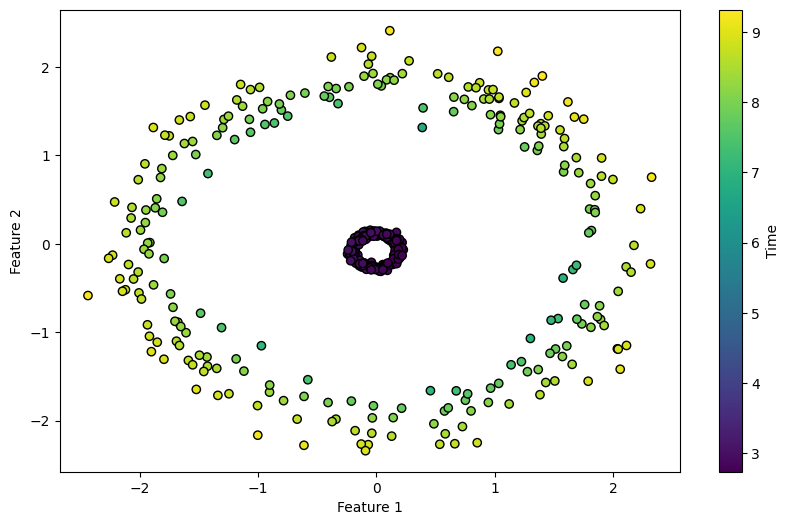

In [18]:
probs = isurvm_circles.predict(X)

cumulative_proba = np.cumsum(probs, axis=1)
survival_function = 1 - cumulative_proba
integrated_сum_proba = np.array([trapezoid(survival_function[i], isurvm_circles._interval_bounds) for i in range(survival_function.shape[0])])

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=integrated_сum_proba, cmap='viridis', edgecolors='k')
plt.colorbar(label='Time')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()